<a href="https://colab.research.google.com/github/MaryEDeignan/NLP_Recipe_Guide/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering
# Unsupervised Learning
- https://projector.tensorflow.org/
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html


In [ ]:
!pip install sentence-transformers

In [20]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import TruncatedSVD

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from google.colab import drive

# connect to your google drive, you don't need to change anything here if you are running in collab
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
file_path = '/content/drive/MyDrive/Fall_2023/NLP/Final/merged_df.csv'

# Read the CSV file into a DataFrame
whole_df = pd.read_csv(file_path)

In [22]:
whole_df.columns

Index(['state', 'title', 'ingredients_x', 'category', 'rating', 'review_count',
       'recipe creator', 'prep_time', 'cook_time', 'total_time', 'servings',
       'calories', 'fat', 'carbs', 'protein', 'cleaned_ingredients',
       'ingredients_y', 'directions', 'link', 'source', 'ner',
       'num_words_title', 'bigrams_title', 'subjectivity', 'polarity',
       'num_ingredients', 'num_words_directions', 'bigrams_directions',
       'pos_counts', 'num_steps'],
      dtype='object')

## Clustering
- https://projector.tensorflow.org/
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [26]:
# Combine 'title', 'directions', and 'ingredients' into a single text field for clustering
whole_df['combined_text'] = whole_df['title'] + ' ' + whole_df['directions'] + ' ' + whole_df['ner']

# Text preprocessing
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

whole_df['combined_tokens'] = whole_df['combined_text'].apply(preprocess_text)

# Convert tokenized text into TF-IDF matrix
tfidf = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
tfidf_matrix = tfidf.fit_transform(whole_df['combined_tokens'])

# K-Means clustering
num_clusters = 5  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign cluster labels to the DataFrame
whole_df['cluster_label'] = kmeans.labels_

# Displaying cluster assignments
cluster_results = pd.DataFrame({
    'Recipe': whole_df['title'],
    'Cluster': whole_df['cluster_label']
})

print(cluster_results)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                       Recipe  Cluster
0                 Brazilian Grilled Pineapple        1
1                      Soul Smothered Chicken        4
2       Slow Cooker Texas Smoked Beef Brisket        1
3                      Best-Ever Texas Caviar        4
4                   South Texas Carne Guisada        4
..                                        ...      ...
795                        Hawaiian Beef Stew        4
796                  Hawaiian Pork Tenderloin        2
797                        Hawaiian Loco Moco        2
798                               Easy Haupia        2
799  Mouthwateringly Tangy Pineapple Meatloaf        3

[800 rows x 2 columns]


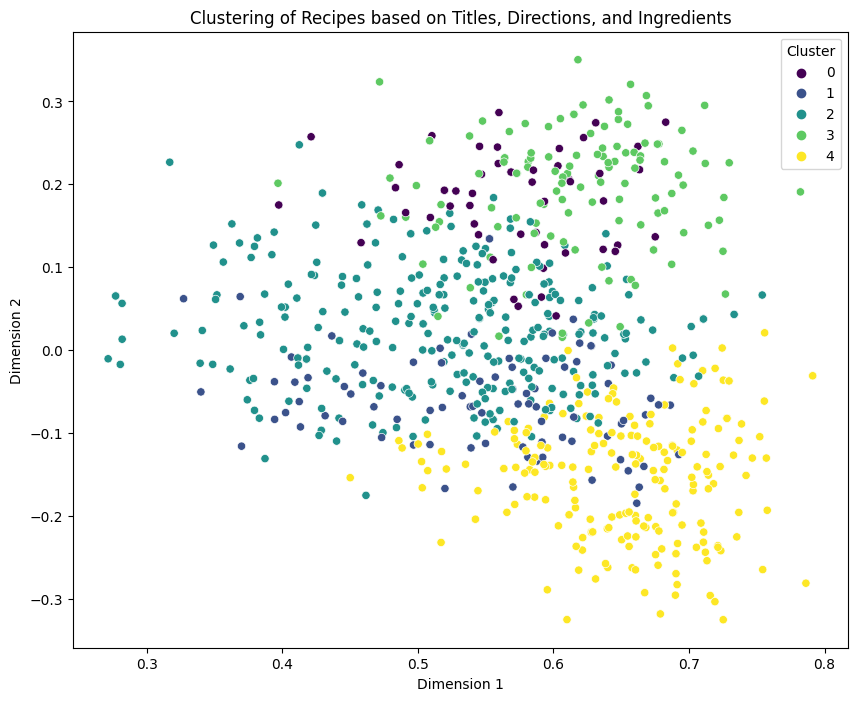

In [24]:
# Dimensionality reduction for visualization (if the TF-IDF matrix is high-dimensional)
svd = TruncatedSVD(n_components=2, random_state=42)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

# Add cluster labels and reduced dimensions to DataFrame
whole_df['X'] = tfidf_matrix_reduced[:, 0]
whole_df['Y'] = tfidf_matrix_reduced[:, 1]

# Plotting clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='X', y='Y', hue='cluster_label', palette='viridis', data=whole_df, legend='full')
plt.title('Clustering of Recipes based on Titles, Directions, and Ingredients')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster')
plt.show()

In [25]:
# Calculate TF-IDF matrix
tfidf = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
tfidf_matrix = tfidf.fit_transform(whole_df['combined_tokens'])

# K-Means clustering
num_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign cluster labels to the DataFrame
whole_df['cluster_label'] = kmeans.labels_

# Calculate Cluster Centroid
cluster_centroids = kmeans.cluster_centers_

# Count in Cluster
count_in_cluster = whole_df['cluster_label'].value_counts().sort_index()

# Assign Cluster ID
whole_df['cluster_id'] = whole_df['cluster_label'] + 1  # Adding 1 to start cluster ID from 1

# Add Cluster Centroid, Count in Cluster, and Cluster ID to a new DataFrame
cluster_summary = pd.DataFrame({
    'Cluster ID': whole_df['cluster_id'].unique(),
    'Count in Cluster': count_in_cluster.values,
    'Cluster Centroid': cluster_centroids.tolist()
})

print(cluster_summary)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Cluster ID  Count in Cluster  \
0           2                57   
1           5                88   
2           3               310   
3           4               127   
4           1               218   

                                    Cluster Centroid  
0  [0.0013774648202881266, 0.22230921652750843, 0...  
1  [0.0018861829977333323, 0.22807788990576225, 0...  
2  [0.003035928860676614, 0.21463691448560615, 0....  
3  [0.004107881852959814, 0.28384600879318667, 0....  
4  [0.00048266588256562455, 0.28561104586909697, ...  


In [30]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import pandas as pd

# Combine 'title', 'directions', and 'ingredients' into a single text field for clustering
whole_df['combined_text'] = whole_df['title'] + ' ' + whole_df['directions'] + ' ' + whole_df['ner']

# Text preprocessing
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply text preprocessing to 'combined_text' column and create a new 'combined_tokens' column
whole_df['combined_tokens'] = whole_df['combined_text'].apply(preprocess_text)

# Train Word2Vec model on tokenized text
word2vec_model = Word2Vec(sentences=whole_df['combined_tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Function to get Word2Vec embeddings for a given text
def get_word2vec_embeddings(text):
    tokens = preprocess_text(text)
    embeddings = [word2vec_model.wv[token] for token in tokens if token in word2vec_model.wv]
    return embeddings

# Apply the get_word2vec_embeddings function to 'combined_text' column and create a new 'embeddings' column
whole_df['embeddings'] = whole_df['combined_text'].apply(get_word2vec_embeddings)

# Flatten the list of embeddings to have a fixed-length vector for each recipe
whole_df['flattened_embeddings'] = whole_df['embeddings'].apply(lambda x: [val for sublist in x for val in sublist])

# Convert flattened embeddings into a DataFrame
embeddings_df = pd.DataFrame(whole_df['flattened_embeddings'].tolist())

# Train Sentence-BERT model on 'combined_text' column
sbert_model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

# Get Sentence-BERT embeddings for each recipe
whole_df['sbert_embeddings'] = whole_df['combined_text'].apply(lambda x: sbert_model.encode(x, convert_to_tensor=True).numpy())

# Convert Sentence-BERT embeddings into a DataFrame
sbert_embeddings_df = pd.DataFrame(whole_df['sbert_embeddings'].tolist())

# Combine Word2Vec and Sentence-BERT embeddings
combined_embeddings_df = pd.concat([embeddings_df, sbert_embeddings_df], axis=1)

# Fill NaN values with zeros
combined_embeddings_df = combined_embeddings_df.fillna(0)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(combined_embeddings_df)

# K-Means clustering on t-SNE results
num_clusters = 5  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tsne_result)

# Assign cluster labels to the DataFrame
whole_df['cluster_label'] = kmeans.labels_

# Displaying cluster assignments
cluster_results = pd.DataFrame({
    'Recipe': whole_df['title'],
    'Cluster': whole_df['cluster_label']
})

print(cluster_results)


                                       Recipe  Cluster
0                 Brazilian Grilled Pineapple        2
1                      Soul Smothered Chicken        0
2       Slow Cooker Texas Smoked Beef Brisket        4
3                      Best-Ever Texas Caviar        4
4                   South Texas Carne Guisada        4
..                                        ...      ...
795                        Hawaiian Beef Stew        0
796                  Hawaiian Pork Tenderloin        1
797                        Hawaiian Loco Moco        4
798                               Easy Haupia        3
799  Mouthwateringly Tangy Pineapple Meatloaf        1

[800 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


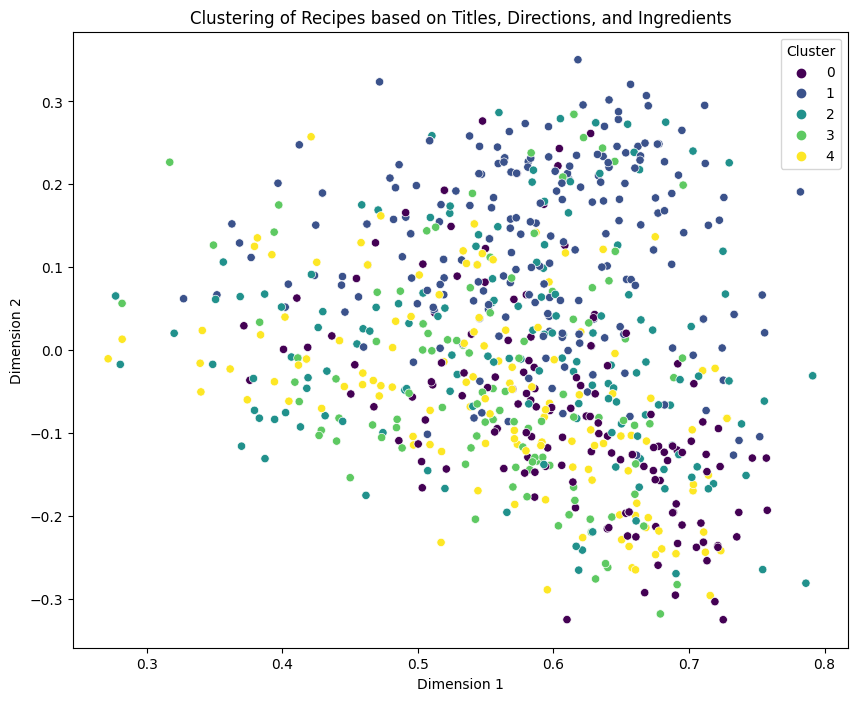

In [31]:
# Dimensionality reduction for visualization (if the TF-IDF matrix is high-dimensional)
svd = TruncatedSVD(n_components=2, random_state=42)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

# Add cluster labels and reduced dimensions to DataFrame
whole_df['X'] = tfidf_matrix_reduced[:, 0]
whole_df['Y'] = tfidf_matrix_reduced[:, 1]

# Plotting clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='X', y='Y', hue='cluster_label', palette='viridis', data=whole_df, legend='full')
plt.title('Clustering of Recipes based on Titles, Directions, and Ingredients')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster')
plt.show()